In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
! pip install statsmodels --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 5.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.8/233.8 kB 7.8 MB/s eta 0:00:00


In [3]:
from statsmodels.tsa.ar_model import AutoReg

In [4]:
dataset = pd.read_csv('min_temperatures.csv', index_col=0, parse_dates=True)
dataset

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8
...,...
1990-12-27,14.0
1990-12-28,13.6
1990-12-29,13.5


In [5]:
temp = dataset.values
temp

array([[20.7],
       [17.9],
       [18.8],
       ...,
       [13.5],
       [15.7],
       [13. ]])

<AxesSubplot: xlabel='Date'>

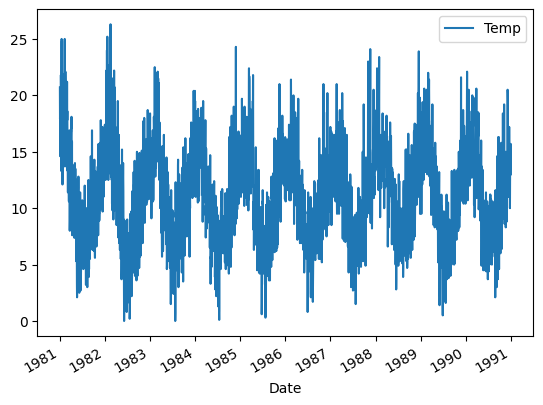

In [6]:
dataset.plot()

In [7]:
# Check for Stationarity

from statsmodels.tsa.stattools import adfuller

test = adfuller(dataset['Temp'], autolag='AIC')

print("1: ADF :", test[0])
print("2: p-value :", test[1])
print("3: Number of Lags :", test[2])
print("4: Number of Observations used for ADF Regression and Critical Values Calculations", test[3])
print("5: Critical Values :")
for key, val in test[4].items():
    print('\t', key, ": ", val)

1: ADF : -4.444804924611695
2: p-value : 0.0002470826300361039
3: Number of Lags : 20
4: Number of Observations used for ADF Regression and Critical Values Calculations 3629
5: Critical Values :
	 1% :  -3.4321532327220154
	 5% :  -2.862336767636517
	 10% :  -2.56719413172842


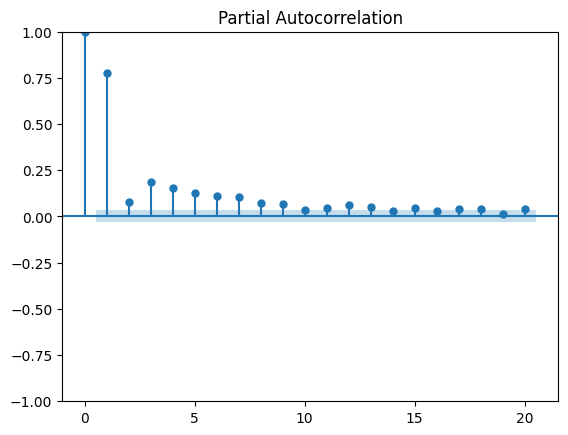

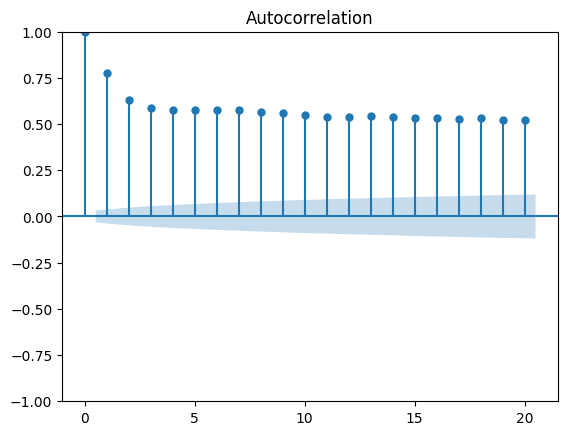

In [8]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

pacf = plot_pacf(dataset['Temp'], lags=20)
acf = plot_acf(dataset['Temp'], lags=20)

In [9]:
# Split Dataset into Train and Test : Last 7 days

train_set = dataset[:len(dataset)-7]
test_set = dataset[len(dataset)-7:]

In [10]:
model = AutoReg(train_set, lags=10).fit()

/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [11]:
print(model.summary())

                            AutoReg Model Results                             
Dep. Variable:                   Temp   No. Observations:                 3643
Model:                    AutoReg(10)   Log Likelihood               -8375.514
Method:               Conditional MLE   S.D. of innovations              2.427
Date:                Wed, 12 Jul 2023   AIC                          16775.028
Time:                        16:13:11   BIC                          16849.402
Sample:                            10   HQIC                         16801.521
                                 3643                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9350      0.142      6.603      0.000       0.657       1.213
Temp.L1        0.6103      0.017     36.795      0.000       0.578       0.643
Temp.L2       -0.0832      0.019     -4.289      0.0

In [12]:
# Make Predictions on Test Set and Compare
pred = model.predict(start=len(train_set), end=len(dataset)-1, dynamic=False)

/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/statsmodels/tsa/deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


3643    11.476793
3644    12.637266
3645    13.057466
3646    13.033789
3647    12.825931
3648    12.657672
3649    12.432736
dtype: float64


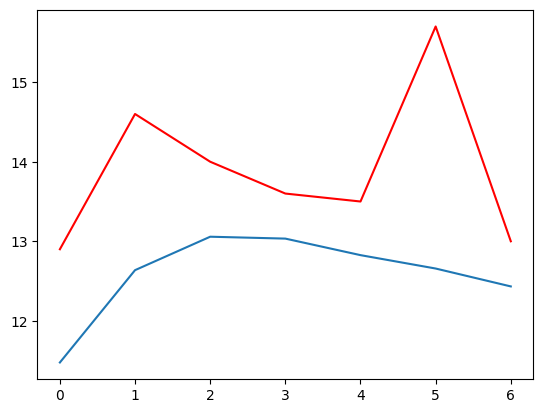

In [13]:
X = [0,1,2,3,4,5,6]
plt.plot(X, pred)
plt.plot(X, test_set, color='red')
print(pred)

In [18]:
import math 
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(test_set,pred))
rmse

1.563819622086044

In [24]:
"Making Future Predictions"

pred_future = model.predict(start=len(dataset)+1, end=len(dataset)+7, dynamic=False)
print("Future predictions for the next week")
print(pred_future)
print("Number of Predictions made: " , len(pred_future))

Future predictions for the next week
3651    12.286088
3652    12.203095
3653    12.249159
3654    12.306189
3655    12.311997
3656    12.272260
3657    12.218437
dtype: float64
Number of Predictions made:  7


/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/statsmodels/tsa/deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)
